In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_swiss_roll
import plotly.express as px # for data visualization
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import cluster
from sklearn.mixture import GaussianMixture
import seaborn as sns
from sklearn import metrics


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("primates-morphology.csv")
df.head(3)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
0,37773,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,...,-0.301822,-0.433051,0.037651,-0.279618,-0.421040,Ph,Presbytis,hosei,U,A
1,37772,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,...,0.215340,-0.299550,0.709472,0.876382,-0.150133,Ph,Presbytis,hosei,F,A
2,22276,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,...,-0.481468,-0.243025,-0.537644,-0.140292,0.082158,Pr,Presbytis,rubicunda,U,A


# Data Inspection and Data Cleaning

###### All 30 dimensions(columns 1 to 30) are independent variables.
###### summary of the central tendency, dispersion and shape of a dataset's distribution

In [3]:
df.describe()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,20,21,22,23,24,25,26,27,28,29
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,...,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,32304.406061,5.537129,1.196007,-0.125596,0.774423,-0.161111,-0.182550,-0.077955,0.180683,0.132617,...,0.057334,-0.014223,0.013269,-0.002892,0.005006,0.003208,-0.001137,-0.002748,-0.012738,-0.013131
std,10702.789245,99.061556,69.971050,56.627559,18.591984,11.336600,8.710069,5.463093,5.214248,4.520787,...,1.254471,1.161247,0.971599,0.932425,0.865874,0.750532,0.720479,0.484438,0.461879,0.374258
min,5547.000000,-201.591249,-111.659165,-114.986835,-54.636918,-19.375303,-24.431319,-54.611282,-20.855026,-18.487708,...,-3.793245,-2.894577,-3.849517,-1.838070,-2.274559,-2.037714,-2.934118,-1.245955,-2.115305,-1.128128
25%,23812.000000,-58.767559,-44.542377,-45.981261,-12.328664,-7.348686,-5.823589,-1.389680,-2.572926,-2.279476,...,-0.697783,-0.739499,-0.482541,-0.585089,-0.587203,-0.413921,-0.411248,-0.300449,-0.320591,-0.248282
50%,35640.000000,-4.994670,18.343281,-2.090244,4.082730,-2.158090,-1.071286,-0.124301,-0.379776,-0.057433,...,0.086293,-0.103932,0.123128,-0.072030,-0.018886,-0.023107,-0.022457,0.001251,-0.018000,-0.010527
75%,39390.000000,89.480991,42.633134,32.805157,16.969797,3.716401,5.078963,1.575336,3.017432,3.199454,...,0.784991,0.633467,0.526249,0.512882,0.621830,0.474782,0.418680,0.274560,0.277566,0.268744
max,61414.000000,192.170450,433.444316,142.161119,33.486208,68.005131,21.570367,18.598186,20.232449,18.859660,...,3.300278,3.376167,3.423704,4.006407,3.131717,2.052453,2.727110,1.319978,1.653007,0.844772


##### There is no missing data. type of dimensions columns are correct.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 36 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    165 non-null    int64  
 1   0             165 non-null    float64
 2   1             165 non-null    float64
 3   2             165 non-null    float64
 4   3             165 non-null    float64
 5   4             165 non-null    float64
 6   5             165 non-null    float64
 7   6             165 non-null    float64
 8   7             165 non-null    float64
 9   8             165 non-null    float64
 10  9             165 non-null    float64
 11  10            165 non-null    float64
 12  11            165 non-null    float64
 13  12            165 non-null    float64
 14  13            165 non-null    float64
 15  14            165 non-null    float64
 16  15            165 non-null    float64
 17  16            165 non-null    float64
 18  17            165 non-null    

In [5]:
# checking for missing values
df.isnull().sum()

Unnamed: 0      0
0               0
1               0
2               0
3               0
4               0
5               0
6               0
7               0
8               0
9               0
10              0
11              0
12              0
13              0
14              0
15              0
16              0
17              0
18              0
19              0
20              0
21              0
22              0
23              0
24              0
25              0
26              0
27              0
28              0
29              0
Abbreviation    0
Genus           0
Species         0
Sex             0
Age             0
dtype: int64

##### There are 25 species and 18 genus in this dataset.
##### All animals'age is A and there are 3 types of sex.

In [6]:
len(df.Species.unique()), len(df.Genus.unique()), len(df.Age.unique()), len(df.Sex.unique())

(25, 18, 1, 3)

In [7]:
df.Species.value_counts()

cristata        18
lar             18
polykomos       10
mitis           10
badius          10
troglodytes      9
larvatus         9
anubis           9
torquatus        9
fascicularis     8
rubicunda        8
gorilla          6
albigena         6
talapoin         5
hosei            5
leucophaeus      4
patas            4
mulatta          3
paniscus         3
fuscata          2
sphinx           2
sylvanus         2
syndactylus      2
pygmaeus         2
gelada           1
Name: Species, dtype: int64

##### There are not enough samples for some species and may cause some problem in clustering if their dimensions differs a lot. Some clustering methods may detect them as an outlier.
#### plotting the number of observasion for every species:

<AxesSubplot:>

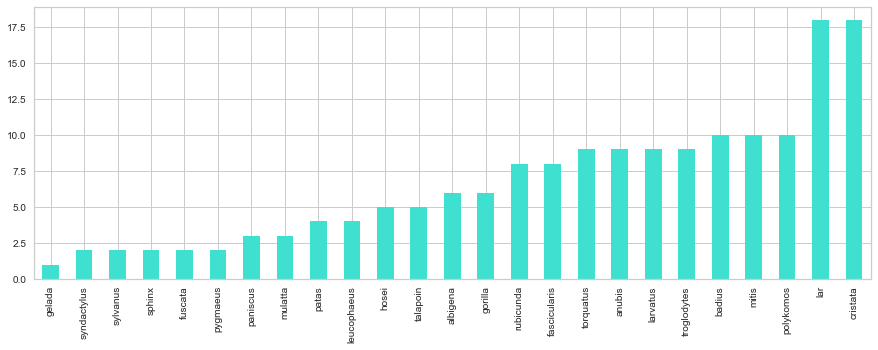

In [8]:
fig = plt.figure(figsize=(15,5))
df.Species.value_counts().sort_values().plot(kind = 'bar', color = "turquoise")

#### plotting the number of observasion for every Genus:

<AxesSubplot:>

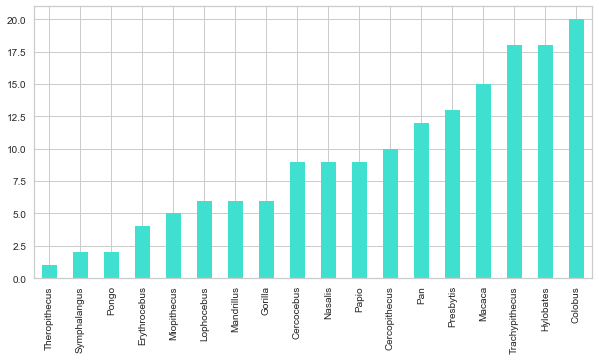

In [9]:
fig = plt.figure(figsize=(10,5))
df.Genus.value_counts().sort_values().plot(kind = 'bar', color = "turquoise")

#### plotting the number of observasion for age type:

<AxesSubplot:>

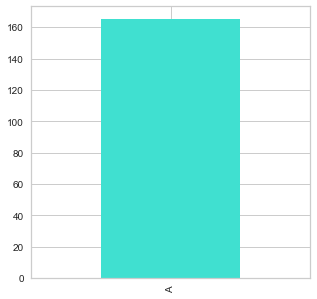

In [10]:
fig = plt.figure(figsize=(5,5))
df.Age.value_counts().sort_values().plot(kind = 'bar', color = "turquoise")

#### plotting the number of observasion for every sex type:

<AxesSubplot:>

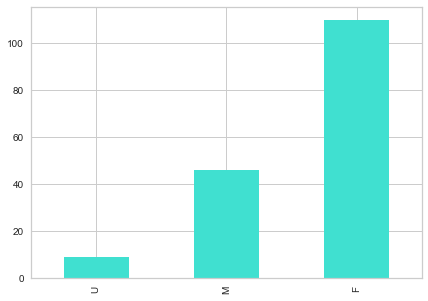

In [11]:
fig = plt.figure(figsize=(7,5))
df.Sex.value_counts().sort_values().plot(kind = 'bar', color = "turquoise")

###### Procrustes Analysis has been already done on data; this method is based on matching corresponding points from two multidimensional datasets and transforms them into maximal superimposition.
### Outliers
###### I made a plot from every row, to see how much variant they are. According to the plot the first 5 dimensions scale are more greater than the last 25 dimensions. For instance, first dimension differs in range -200 to 200.
to detect outliers, I made a plot of every observation, and also by every dimension seperately.

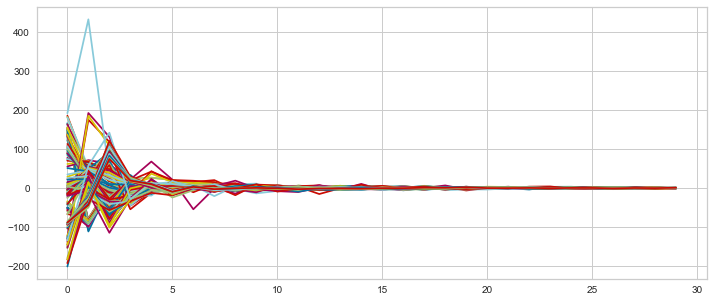

In [12]:
fig = plt.figure(figsize=(12,5))
for i in range(len(df)):
  plt.plot(df.iloc[i,1:31].values)
plt.show()

###### The blue line seems to be outlier, but first I find it and then compare its data with other rows that have a same Species:

In [13]:
df[df["1"]>200]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
95,23168,192.17045,433.444316,34.807178,-27.625401,9.789996,15.62244,6.566363,-20.855026,5.005481,...,-0.370829,2.355009,0.871267,-0.000879,-0.50541,Ml,Mandrillus,leucophaeus,M,A


##### According to below data, the first and second dimension of row=95 is out of range of its peers.

In [14]:
df[df.Species == "leucophaeus"]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
93,23169,-125.154584,192.701142,131.159145,-1.167256,11.163152,0.416215,2.229485,-1.205932,7.865337,...,-0.870057,-0.420839,-0.722077,0.367416,0.471271,Ml,Mandrillus,leucophaeus,M,A
94,19986,-150.646943,185.654197,108.911623,4.531810,15.215299,-11.695655,-2.463766,5.375390,9.056411,...,-0.737482,-2.934118,0.419214,-0.192817,0.770003,Ml,Mandrillus,leucophaeus,M,A
95,23168,192.170450,433.444316,34.807178,-27.625401,9.789996,15.622440,6.566363,-20.855026,5.005481,...,-0.370829,2.355009,0.871267,-0.000879,-0.505410,Ml,Mandrillus,leucophaeus,M,A
128,20085,-17.971723,1.474540,-29.653824,-19.713723,12.585847,-8.992318,-0.481300,2.274956,11.108156,...,-0.331857,0.108049,0.264837,0.426873,-0.225587,Ml,Mandrillus,leucophaeus,M,A


###### I check same species data to find outliers in this way:

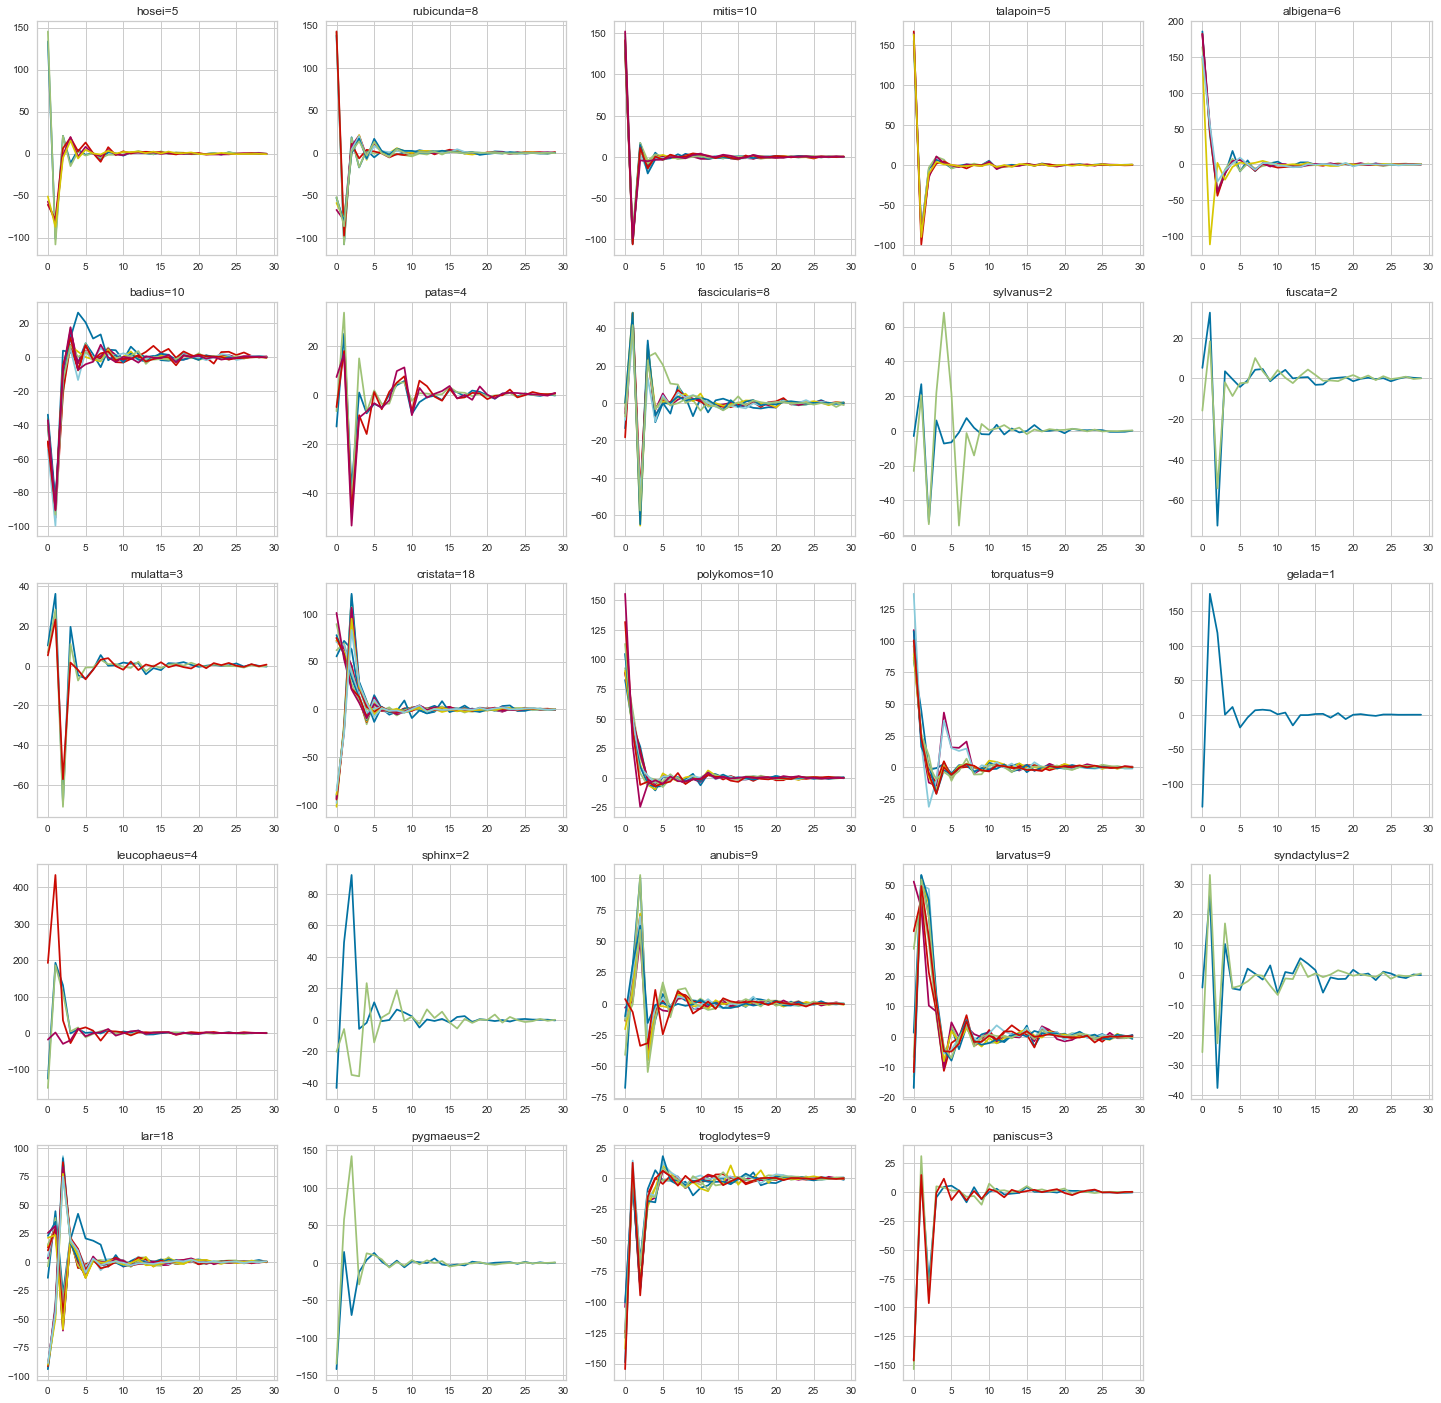

In [15]:
fig = plt.figure(figsize=(25,25))
for c,num in zip(df.Species.unique(), range(1,25)):
    df0=df[df['Species']==c]
    ax = fig.add_subplot(5,5,num)
    for i in range(len(df0)):
        plt.plot(df0.iloc[i,1:31].values)
    ax.set_title("{c}={l}".format(c=c, l=len(df0)))

###### I check the first 6 dimensions because they have the same scale:

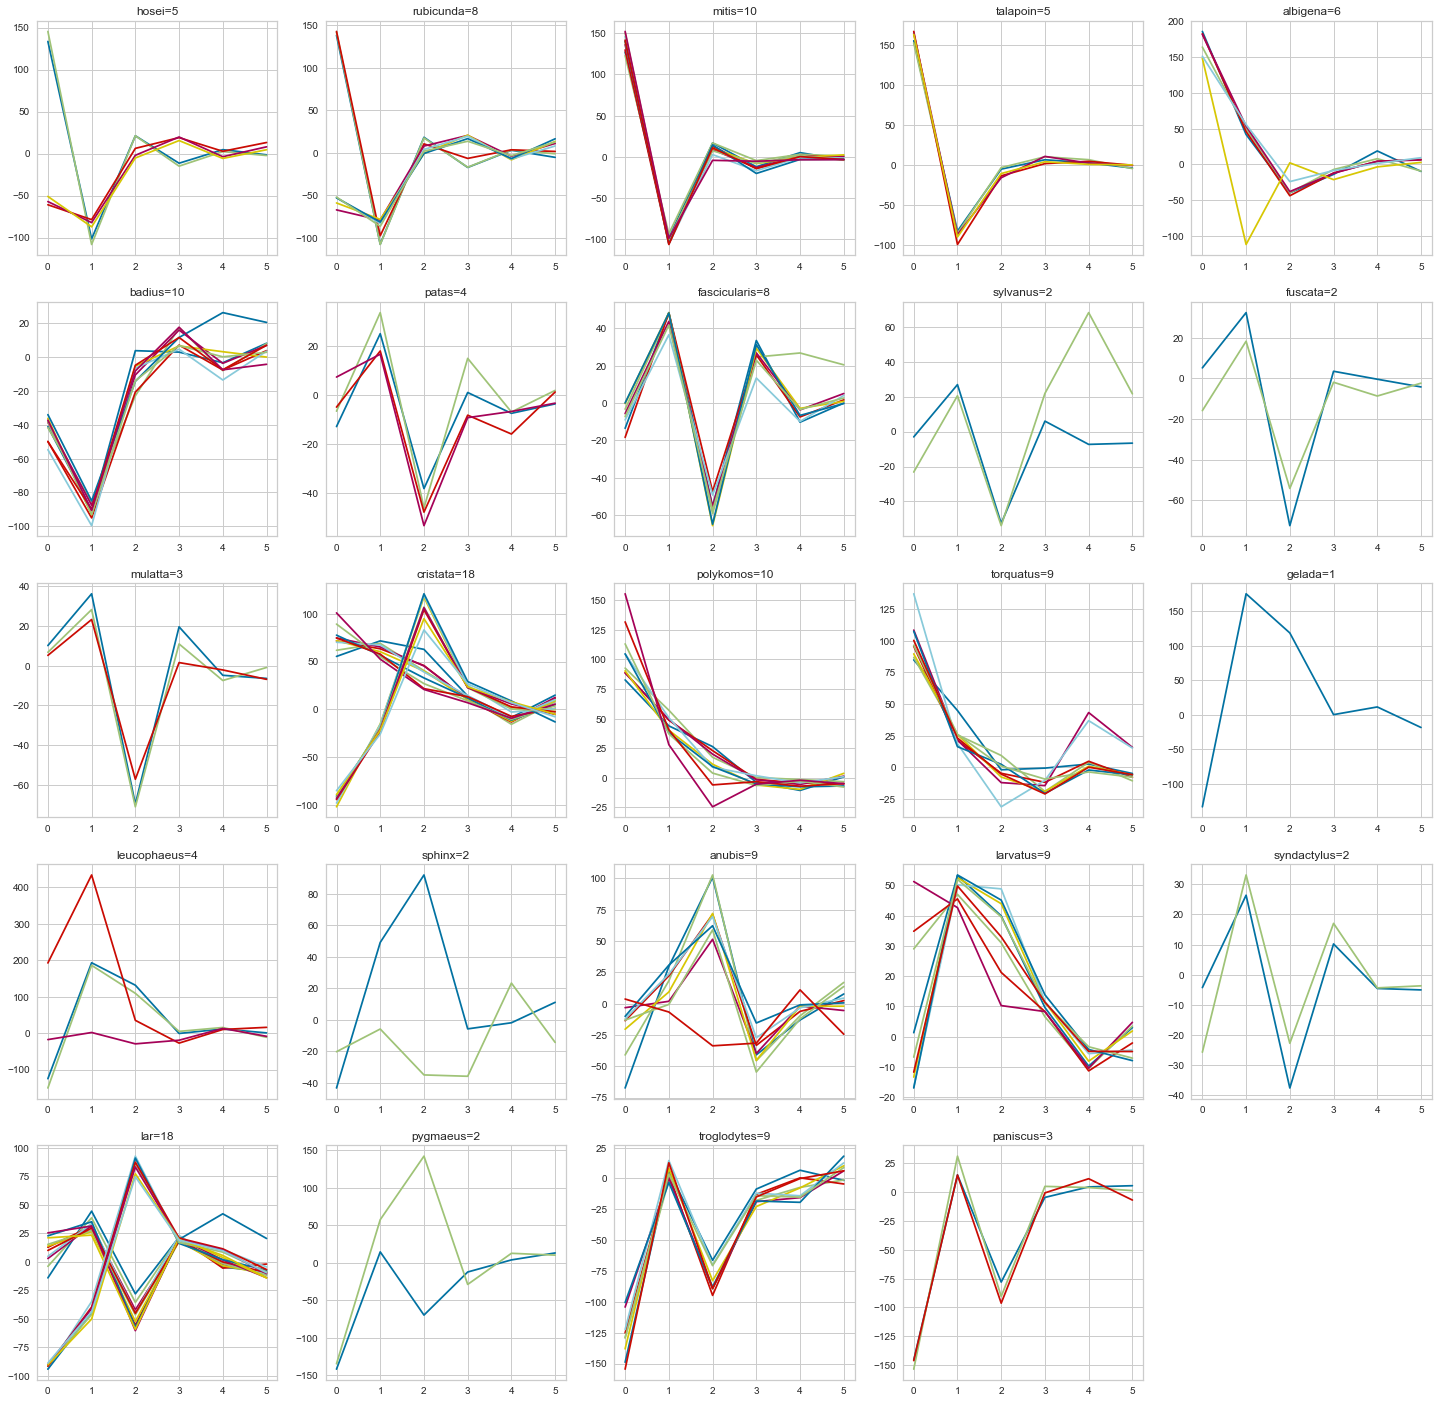

In [16]:
fig = plt.figure(figsize=(25,25))
for c,num in zip(df.Species.unique(), range(1,25)):
    df0=df[df['Species']==c]
    ax = fig.add_subplot(5,5,num)
    for i in range(len(df0)):
        plt.plot(df0.iloc[i,1:7].values)
    ax.set_title("{c}={l}".format(c=c, l=len(df0)))

##### it seems there are some outliers in sphinx, pygmaeus, leucophaeus.

In [17]:
df[df.Species =="leucophaeus"]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
93,23169,-125.154584,192.701142,131.159145,-1.167256,11.163152,0.416215,2.229485,-1.205932,7.865337,...,-0.870057,-0.420839,-0.722077,0.367416,0.471271,Ml,Mandrillus,leucophaeus,M,A
94,19986,-150.646943,185.654197,108.911623,4.531810,15.215299,-11.695655,-2.463766,5.375390,9.056411,...,-0.737482,-2.934118,0.419214,-0.192817,0.770003,Ml,Mandrillus,leucophaeus,M,A
95,23168,192.170450,433.444316,34.807178,-27.625401,9.789996,15.622440,6.566363,-20.855026,5.005481,...,-0.370829,2.355009,0.871267,-0.000879,-0.505410,Ml,Mandrillus,leucophaeus,M,A
128,20085,-17.971723,1.474540,-29.653824,-19.713723,12.585847,-8.992318,-0.481300,2.274956,11.108156,...,-0.331857,0.108049,0.264837,0.426873,-0.225587,Ml,Mandrillus,leucophaeus,M,A


<AxesSubplot:xlabel='Species', ylabel='1'>

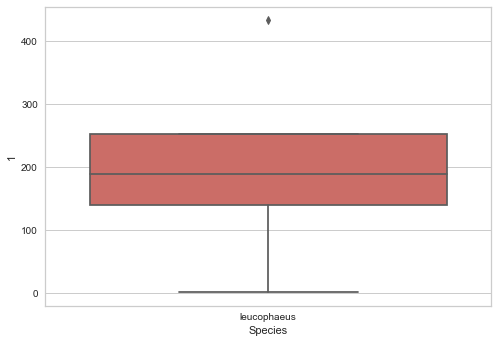

In [18]:
df_s = df[df.Species =="leucophaeus"]
sns.boxplot(x='Species', y='1', data=df_s, palette='hls')

In [19]:
df[df.Species =="sphinx"]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
96,34272,-43.167230,49.101925,91.862587,-5.701980,-1.834393,11.127701,-0.820905,-0.067443,6.549019,...,0.592365,0.198769,0.119692,0.119958,-0.343109,Mx,Mandrillus,sphinx,F,A
129,34089,-20.180528,-5.791192,-34.893355,-35.748137,23.304542,-14.292509,1.478718,4.357142,18.859660,...,-1.342456,-0.816099,0.610572,-0.593304,0.093162,Mx,Mandrillus,sphinx,M,A


In [20]:
df[df.Species =="pygmaeus"]

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,Abbreviation,Genus,Species,Sex,Age
130,50958,-141.612340,14.576783,-69.584902,-12.202476,3.917215,13.174104,1.623507,-5.240448,2.959711,...,1.340974,-0.919610,0.706117,-0.576702,0.278123,Py,Pongo,pygmaeus,F,A
149,37518,-134.424124,57.516734,142.161119,-28.754181,12.706337,10.287928,4.677626,-6.276084,1.289860,...,0.709214,-0.716214,-0.021858,-0.046041,0.533902,Py,Pongo,pygmaeus,F,A


##### Furthermore, for species: lar and cristata the first dimension of some rows are in two different ranges! and as I checked it is not because of different age or sex
###### for lar, rows:[158 ...164] and [116 ....126]

In [21]:
df[df.Species =="lar"].sort_values("0").iloc[:,1:6]

,0,1,2,3,4
159,-94.050832,-44.542377,91.023408,16.231518,1.952556
158,-94.028973,-34.817770,92.731672,17.851707,10.702599
161,-91.489354,-39.614165,87.430951,20.871706,11.444575
160,-91.085462,-46.160638,86.488654,16.969797,8.581993
163,-90.248202,-50.111180,77.285086,19.578454,5.634918
162,-90.204104,-40.985982,83.286250,19.714259,10.448984
164,-88.663448,-43.835382,74.681197,19.086880,9.755993
116,-14.006008,44.464811,-28.007343,21.706670,-4.559393
117,-3.903520,38.604078,-35.527285,21.709903,-0.392185
119,2.985516,31.763585,-42.037552,18.095636,-2.228577


In [22]:
df[df.Species =="lar"].sort_values("0").iloc[:,34:36]

,Sex,Age
159,F,A
158,F,A
161,F,A
160,F,A
163,F,A
162,F,A
164,F,A
116,F,A
117,F,A
119,F,A


###### for cristata, rows:[150 ...157] are negative and [63 ....72] posititive and it is not dependant to sex and age

In [23]:
df[df.Species =="cristata"].sort_values("0").iloc[:,1:6]

,0,1,2,3,4
150,-102.091329,-15.366459,117.524136,23.394295,1.771777
151,-98.130653,-16.075602,119.420606,24.846228,-2.883396
154,-94.518137,-23.353650,104.280892,22.927154,2.520431
155,-93.491353,-21.019748,106.386900,22.723801,5.593776
153,-92.196429,-19.047839,106.981009,22.532879,0.310591
152,-90.970166,-20.061031,120.916385,29.010300,8.663226
156,-89.317815,-22.003474,94.843262,23.453983,7.796631
157,-85.220769,-25.975019,83.051402,26.550478,6.887293
63,55.360234,71.609687,62.753012,13.876409,-8.520152
64,61.762934,69.019494,40.380098,12.939347,-15.695427


In [24]:
df[df.Species =="cristata"].sort_values("0").iloc[:,34:36]

,Sex,Age
150,F,A
151,F,A
154,F,A
155,F,A
153,F,A
152,F,A
156,F,A
157,F,A
63,F,A
64,F,A


###### I checked the rest dimensions together because they have the same scale:

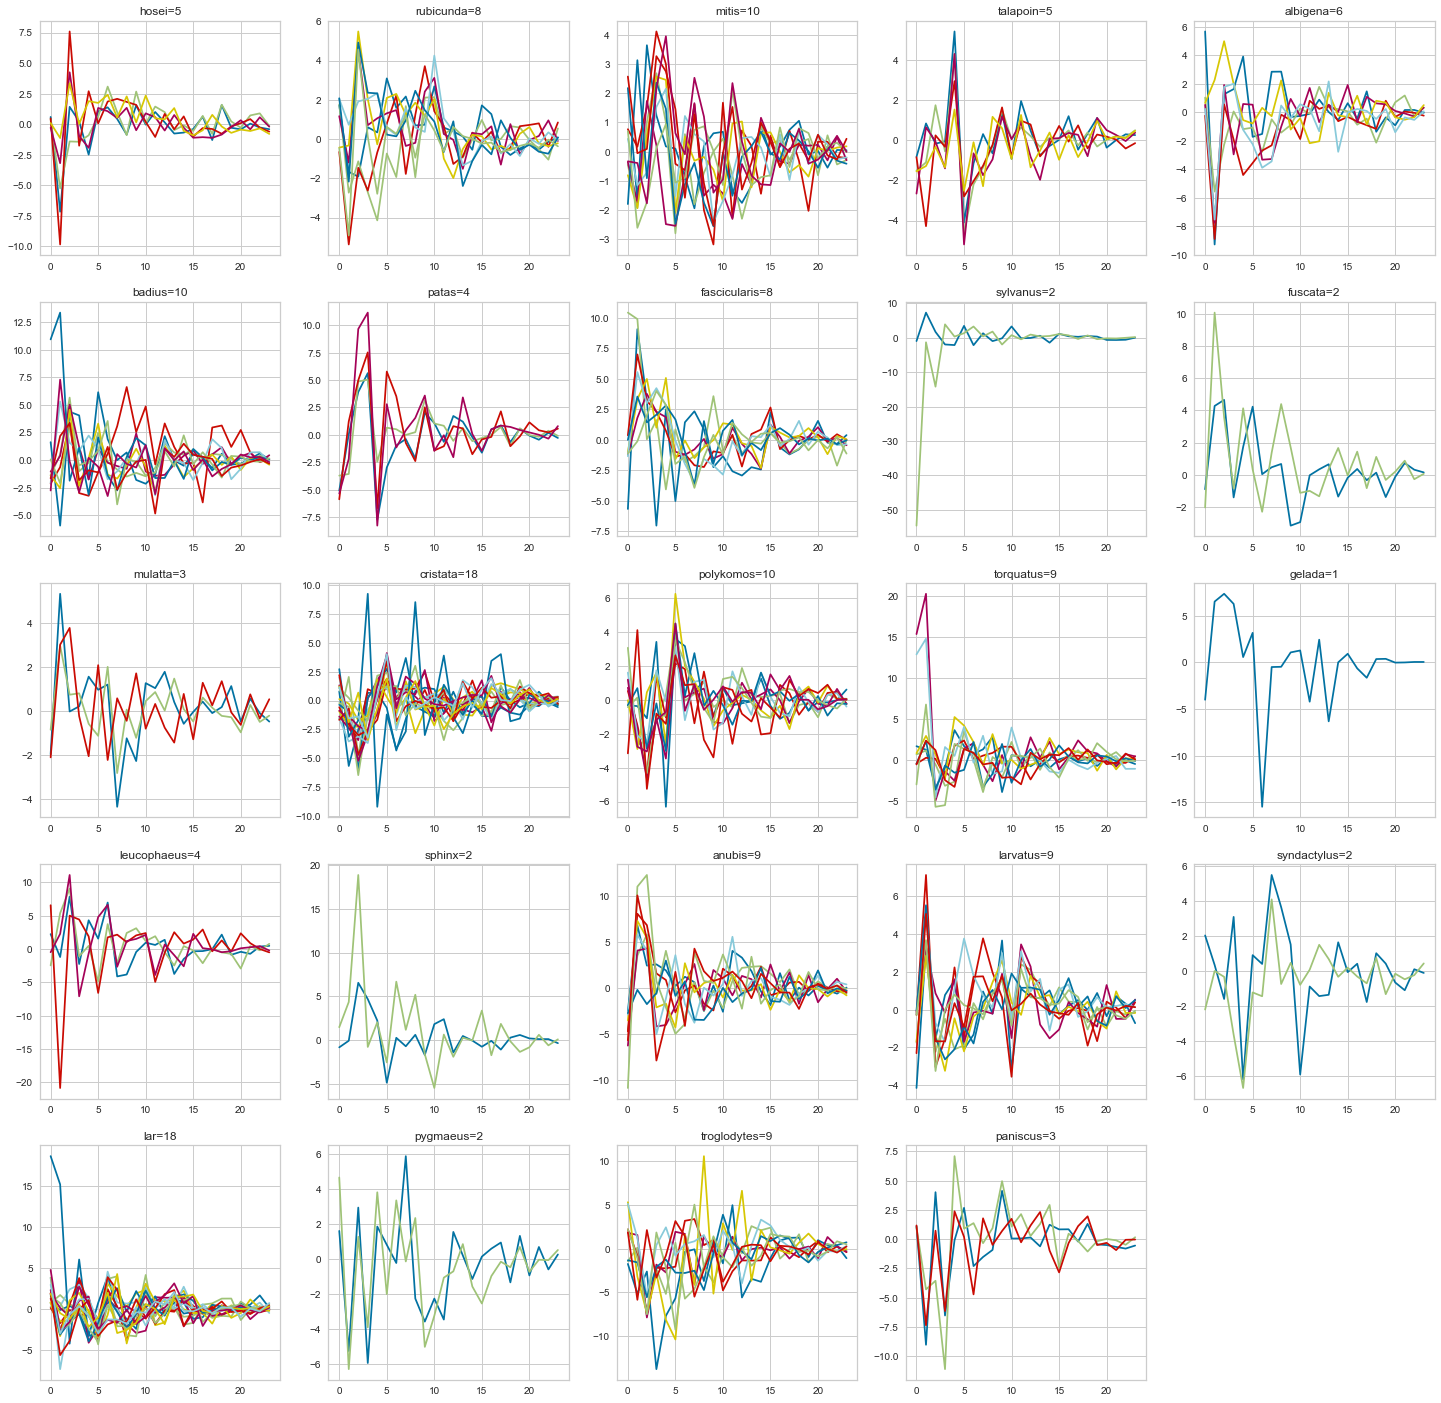

In [27]:
fig = plt.figure(figsize=(25,25))
for c,num in zip(df.Species.unique(), range(1,25)):
    df0=df[df['Species']==c]
    ax = fig.add_subplot(5,5,num)
    for i in range(len(df0)):
        plt.plot(df0.iloc[i,7:31].values)
    ax.set_title("{c}={l}".format(c=c, l=len(df0)))

###### It is also possible to display outliers for every dimension(below box plot is for the third dimension) but it is not necessary. In my opinion, as distinct species's dimension are different, we can not compare whole rows of one column.

<AxesSubplot:xlabel='Species', ylabel='2'>

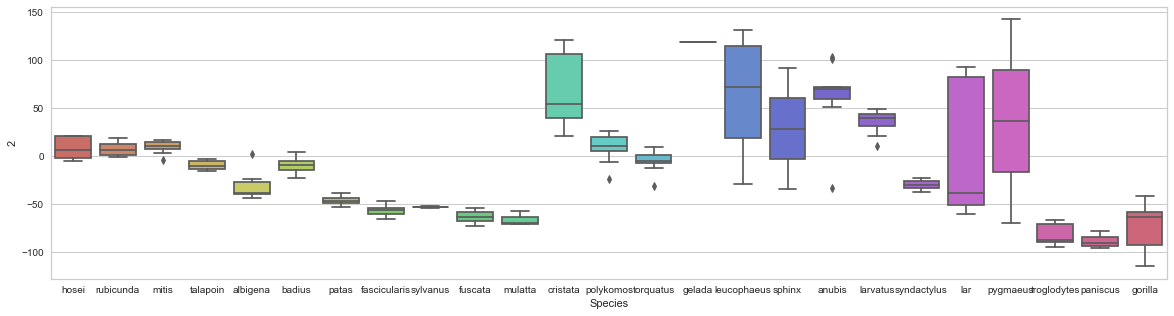

In [44]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Species', y='2', data=df, palette='hls')

###### 1. there is only one row that the dimensions is out of range , like leucophaeus.
###### 2. there are more than one rows for some specific species that the dimensions are different  from the same species, like lar and cristata.
###### for the first type I expect some clustering models (for example, DBSCAN) deal with these outlieres but for the second type they will not be considered as outliers and I jus expect they get different labels in clustering.(i.e, lar observation may locate in different clusters.)

### Correlation
###### now, I check the correlation between all dimensions; There is no correlation between them and no need to drop any columns.

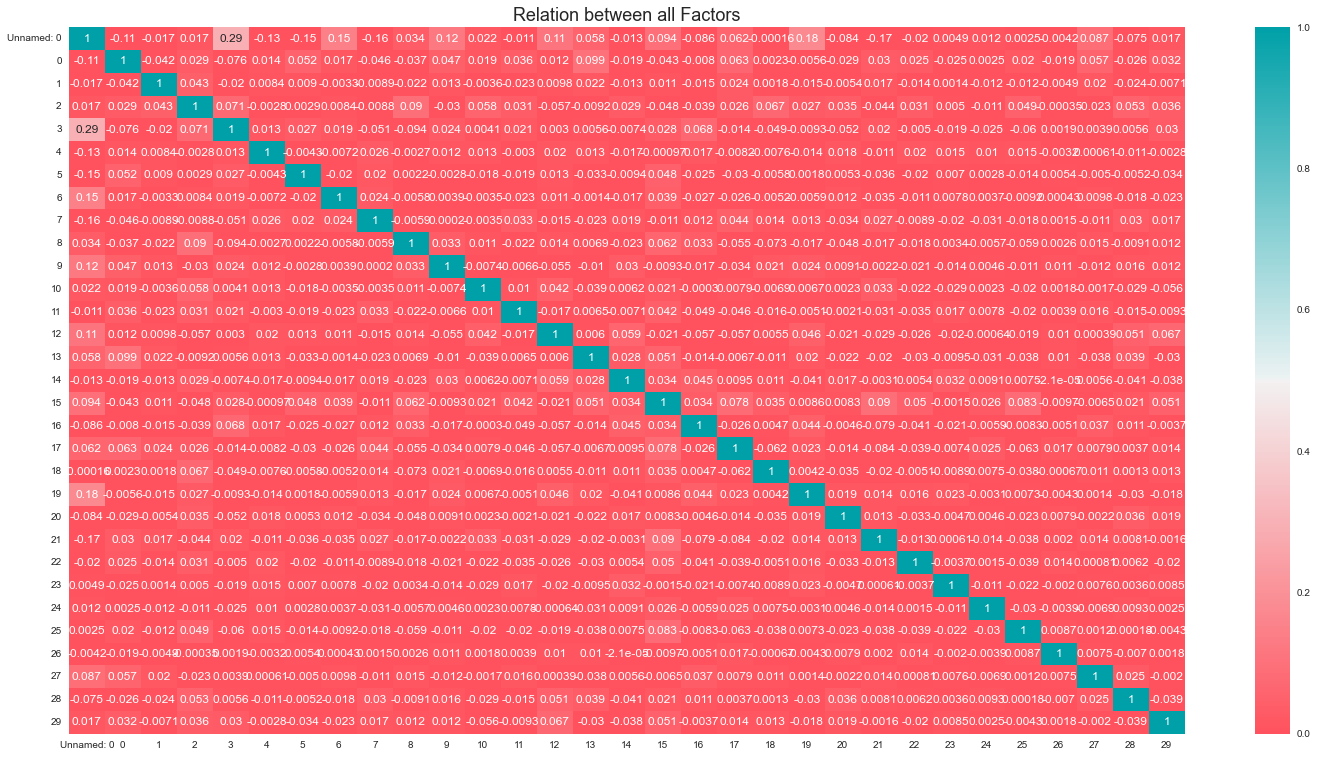

In [28]:
plt.rcParams["figure.figsize"] = (25, 13)
cmap = sns.diverging_palette(10, 200, 100, 60, as_cmap=True)
# cmap = sns.color_palette("mako", as_cmap=True)
# cmap = sns.color_palette("Spectral", as_cmap=True)
plt.title('Relation between all Factors', fontsize=18)
sns.heatmap(df.corr(), annot = True, cmap=cmap, vmin=0, vmax=1)
plt.show()

##### I define a new dataframe and drop outliers to see the difference but I use main df for.

In [30]:
new_df = df.copy()
new_df.drop(index=95, axis = 0, inplace = True)
new_df.drop(index=96, axis = 0, inplace = True)
new_df.drop(index=149, axis = 0, inplace = True)
new_df.drop(index=57, axis = 0, inplace = True)
new_df.shape

(161, 36)

### skewness:
There is no need to check the skewness of data, because it is coordinates.it is related to the distribution of observations and in this dataset, it is meaningless.
### normalization and standardiztion:
As Procrustes Analysis is done on data, data is already normalized and standardize and all dimensions have the same scale. 
standardizing the variables is important to have equal variance because it means they get weighted equally.

In [43]:
# d = dict([(y,x+1) for x,y in enumerate(sorted(set(df.Species)))])
# df['Species_num'] = df['Species'].map(d)
# df.head(3)

In [87]:
X = df.iloc[:, 1:31]
X

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,133.426742,-101.627603,21.125902,-11.518251,4.621089,-1.519551,0.583410,-7.182875,1.410030,0.216411,...,-0.697783,-0.406979,0.607499,-1.309488,1.555190,-0.301822,-0.433051,0.037651,-0.279618,-0.421040
1,145.344740,-108.229812,21.121390,-14.982879,2.299335,-2.354040,0.431199,-5.266930,-1.424469,-1.451953,...,-0.105124,-0.569739,0.669346,-0.805954,1.583042,0.215340,-0.299550,0.709472,0.876382,-0.150133
2,137.773342,-107.162743,18.232497,-17.116294,3.016809,-5.295234,1.716895,-1.668914,-1.917478,0.601120,...,-0.546710,1.715016,1.269193,-0.397373,-0.813108,-0.481468,-0.243025,-0.537644,-0.140292,0.082158
3,141.523739,-107.436626,17.448083,-16.861469,3.382894,-1.071286,1.768891,-2.735232,-1.136700,-2.706925,...,-0.025537,0.972070,-0.066568,0.001964,0.656327,0.586941,-0.043639,-0.518699,-1.051100,0.542354
4,142.357906,-97.195294,10.511391,-6.520641,3.555506,1.652390,-0.655919,-5.373075,-1.466841,-2.626544,...,0.327166,-0.174675,0.368314,-0.700708,-0.450873,0.653851,0.718319,0.798722,-0.396749,0.844772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,-91.085462,-46.160638,86.488654,16.969797,8.581993,-8.889106,3.806365,-2.572926,-1.852834,-0.197013,...,1.064458,1.526719,-1.573739,-0.523507,0.069268,0.360452,0.513323,0.043604,0.294724,-0.003514
161,-91.489354,-39.614165,87.430951,20.871706,11.444575,-6.707486,1.910320,-5.616304,-3.878495,-0.037360,...,-2.074445,-0.037273,-0.110737,0.018629,0.913451,-0.368755,-0.173323,-0.627292,0.092090,0.444992
162,-90.204104,-40.985982,83.286250,19.714259,10.448984,-10.269775,4.749293,-2.725633,-1.577457,2.706787,...,0.687204,1.546473,-2.072265,-0.240351,-0.184852,-0.033229,0.434486,-0.158110,-0.416191,0.160474
163,-90.248202,-50.111180,77.285086,19.578454,5.634918,-13.863556,1.840409,-0.507864,-1.227452,0.595468,...,1.502094,1.749599,-0.235770,-0.484359,0.194612,0.125275,-0.018511,0.080169,-0.235063,0.317110


## Visualisation
#### In order to visualizing the observation, I used PCA and t-SNE methods for Dimensionality Reduction. However, visualisation is not always a reliable method to determine the number of clusters.

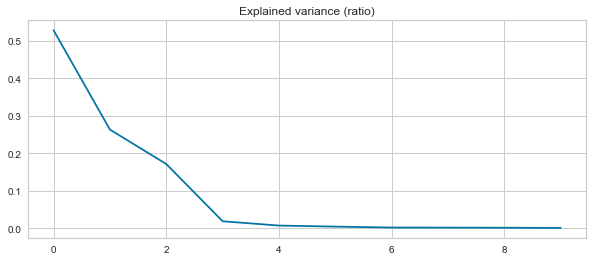

In [88]:
pca = PCA(n_components=10)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
plt.figure(figsize=(10,4))
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained variance (ratio)')
plt.show()

##### According to elbow plot, there are 3 eigenvalues that explains much of the variability.(96.5)

In [89]:
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.dot(X_centered.T, X_centered) / 165
eigenvalues = pca.explained_variance_
print('Cumulative sum:\n', eigenvalues.cumsum() * 100 / np.sum(eigenvalues), '\n')

Cumulative sum:
 [ 53.00881513  79.40739859  96.58137526  98.42349319  99.11591888
  99.5235027   99.68524306  99.82996203  99.93825666 100.        ] 



so I don't expect that 2-dimensional plot can be representative of distribution of every observation and I made a 3-D plot that makes more sence.

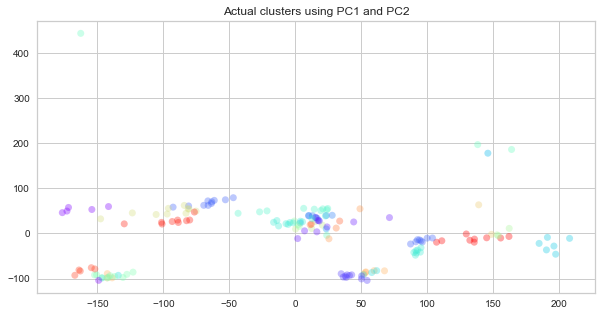

In [90]:
plt.figure(figsize=(10,5))
plt.scatter(principalDf['pc1'], principalDf['pc2'], c = df.Species_num, cmap="rainbow", edgecolor = "None", alpha=0.35)
plt.title('Actual clusters using PC1 and PC2')
plt.show()

In [91]:
fig = px.scatter_3d(None, x=principalDf['pc1'], y=principalDf['pc2'], z=principalDf['pc3'])

fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.update(layout_coloraxis_showscale=False)
fig.show()

# t-SNE
t-SNE is a dimensionality reduction technique and used for visualization. it returns a matrix of two-dimensional embeddings of the high-dimensional rows of X.
* Perplexity balances the attention t-SNE gives to local and global aspects of the data and can have large effects on the resulting plot.
Perplexity ~ N^(1/2).

Sometimes, distances between well-separated clusters in a t-SNE plot may mean nothing.

C:\Users\a.jalali\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\a.jalali\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



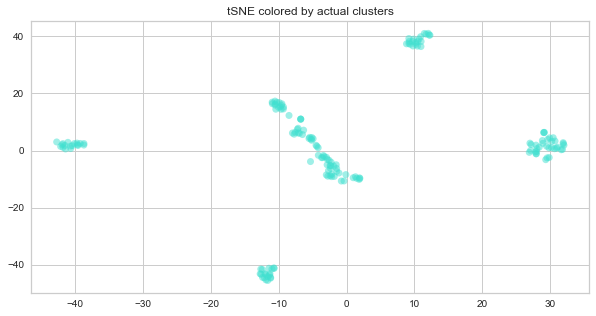

In [92]:
tsne = TSNE(perplexity=13, n_iter= 1000, random_state=42)
Y = tsne.fit_transform(X)
plt.figure(figsize=(10,5))
plt.scatter(Y[:,0],Y[:,1], edgecolor = "None", alpha=0.5, color = "turquoise")
plt.title('tSNE colored by actual clusters')
plt.show()

# Clustering
Clustering is the task of grouping a set of objects in a way that objects in the same group are more similar to each other than to those in other groups.
Generally, there are four types of clustering:
1. graph-based clustering
2. Density-based clustering
3. Hierarchical clustering
4. centroid-based clustering

I am going to examine multiple methods of these types and investigate how well they are.

Below image was a good guide to find a good method for this dataset.
the data shape is a mixture of third and forth row of below image and I expect Spectral Clustering, Agglomerative Clustering and GaussianMixture do the best clustering for this dataset.

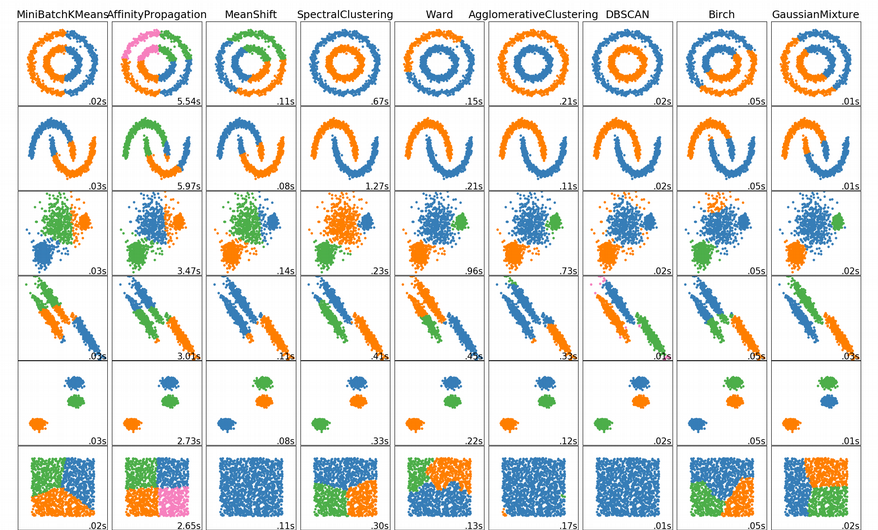

### Kmeans
Kmeans is centroid-based clustering clustering method that the number of clusters should be specified. It identifies k number of centroids, and then allocates every observation to the nearest cluster. It considers two assumptions regarding the clusters:
1. the clusters are spherical.
2. the clusters are of similar size.

If any of the assumptions are violated then the clusters are not formed properly.
the first centroid is a random observation. and by applying k-means++, the next centroids will be choosed based on a probability and it is as far as possible.
I try with different number of clusters to see whcih one is the best.
comparing the below plots, 6 cluster is the best one.

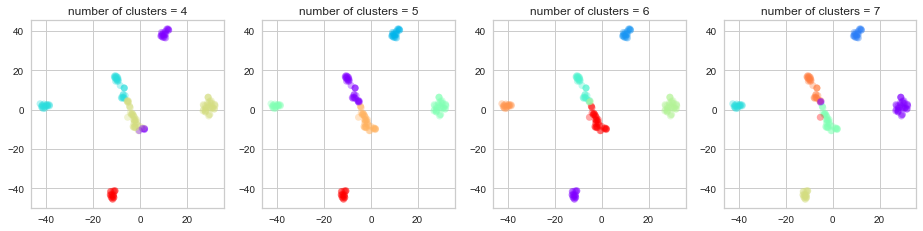

In [93]:
fig = plt.figure(figsize=(20,20))
n = 1
for cl in range(4,8):
    ax = fig.add_subplot(5,5,n)
    kmns = KMeans(n_clusters=cl, init='k-means++', random_state=42)
    kmns_y = kmns.fit_predict(X)
    plt.scatter(Y[:,0],Y[:,1], edgecolor = "None", c = kmns_y, cmap="rainbow", alpha=0.35)
    ax.set_title("number of clusters = {cl}".format(cl=cl))
    n+=1

##### I also used KElbowVizualizer function to find the optimal number of clusters

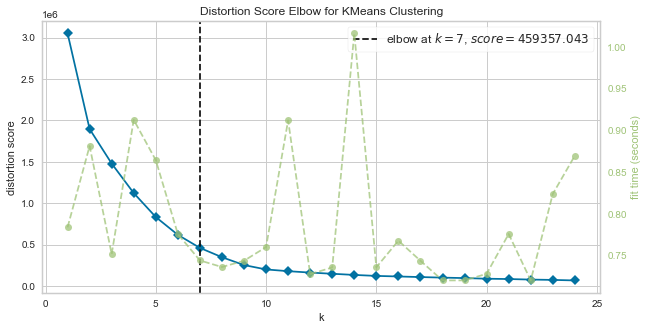

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [94]:
plt.figure(figsize=(10,5))
visualizer = KElbowVisualizer(kmns, k=(1,25))
visualizer.fit(X)
visualizer.show()

For n_clusters = 4 The average silhouette_score is : 0.4323424866998325
For n_clusters = 5 The average silhouette_score is : 0.4840795663958202
For n_clusters = 6 The average silhouette_score is : 0.5358127686096645
For n_clusters = 7 The average silhouette_score is : 0.546719247020638
For n_clusters = 8 The average silhouette_score is : 0.5712924915286265


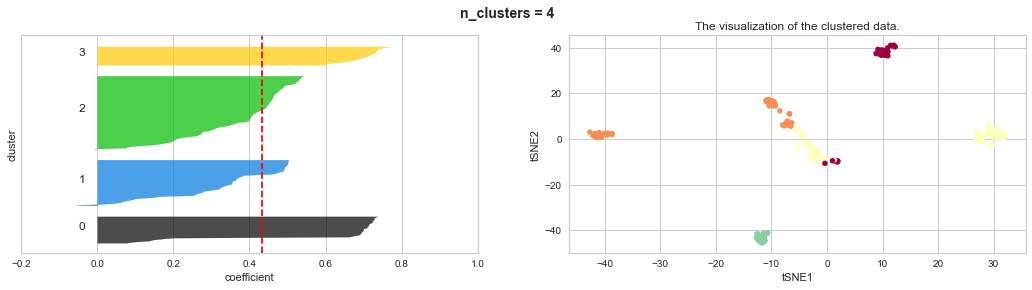

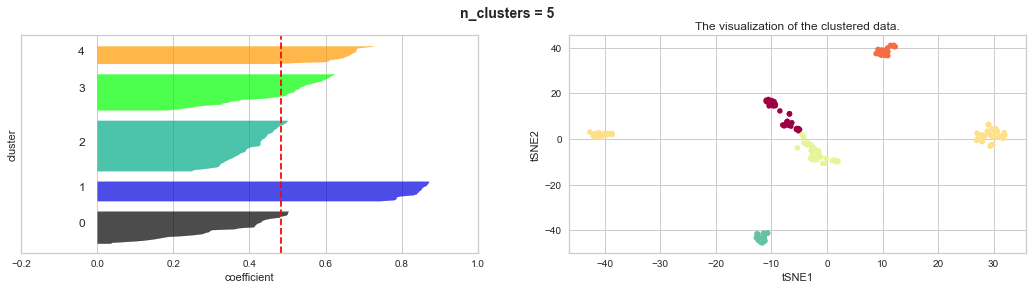

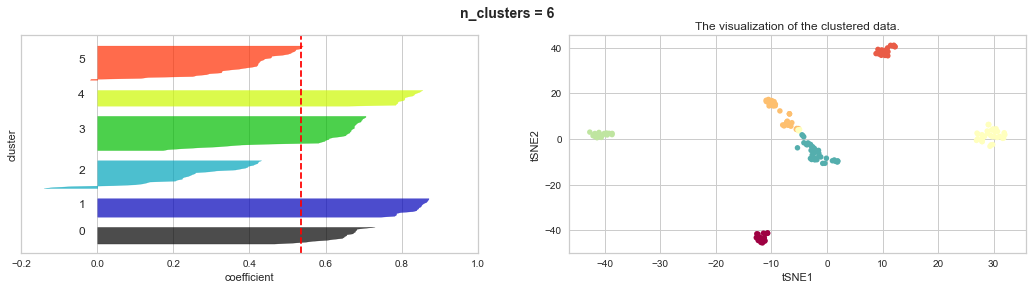

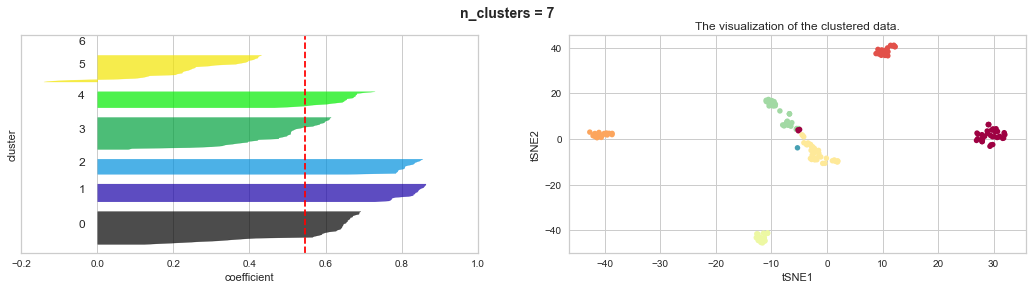

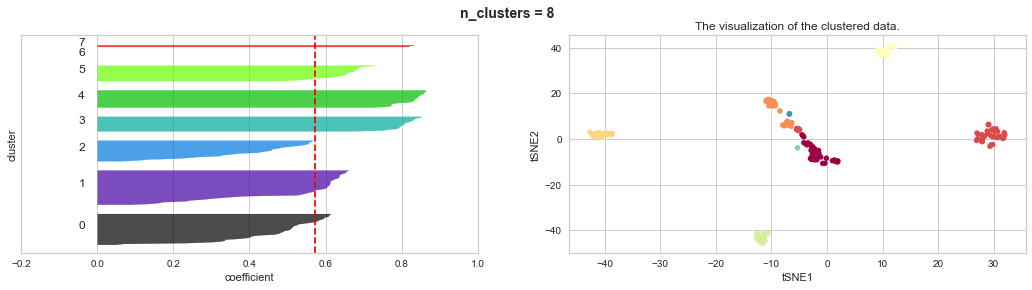

In [95]:
from matplotlib import cm
def Silhouette_diagram(range_n_clusters, X):
    silhouette_avg_n_clusters = []
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 4)
        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
        clusterer = cluster.KMeans(n_clusters=n_clusters, random_state=42)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = metrics.silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
            "The average silhouette_score is :", silhouette_avg)

        silhouette_avg_n_clusters.append(silhouette_avg)
        sample_silhouette_values = metrics.silhouette_samples(X, cluster_labels)
        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values,
                            facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10  # 10 for the 0 samples
        ax1.set_xlabel("coefficient")
        ax1.set_ylabel("cluster")
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.suptitle(("n_clusters = %d" % n_clusters),
                     fontsize=14,
                     fontweight='bold')
        
        # 2nd Plot showing the actual clusters formed
        cmap = cm.get_cmap("Spectral")
        colors = cmap(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(Y[:, 0], Y[:, 1], s=30, lw=0,
                    c=colors, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("tSNE1")
        ax2.set_ylabel("tSNE2")
    plt.show()
Silhouette_diagram([4,5,6,7,8], X)

#### According to Elbow plot, Silhouette diagram and scatter plot, data is grouped to 6 clusters in the best because of the thikness and height. However the blue cluster's height in Silhouette is not high enough. Also 7 cluster is not optimal and dedicate one observation for one cluster while the number of clusters should be as small as possible.

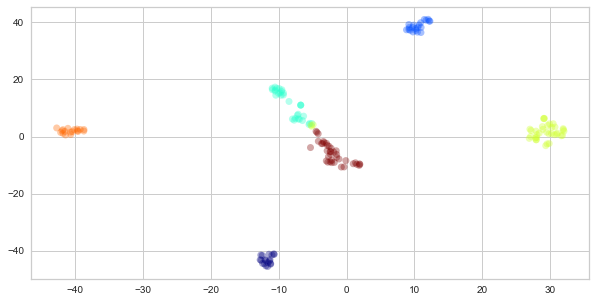

In [99]:
kmns = KMeans(n_clusters=6, init='k-means++', random_state=42)
kmns_y = kmns.fit_predict(X)
plt.figure(figsize = (10,5))
plt.scatter(Y[:,0],Y[:,1], edgecolor = "None", c = kmns_y, cmap="jet", alpha=0.35)

In [96]:
fig = px.scatter_3d(None, x=principalDf['pc1'], y=principalDf['pc2'],
                    z=principalDf['pc3'], color = kmns_y)
fig.update_traces(marker=dict(size=4))
fig.update(layout_coloraxis_showscale=False)
fig.show()

### GaussianMixture 
It is another Centroid-based clustering that handles spherical or ellipsoidal clumps and can discover complex patterns and group them.It is a good model for this dataset and performs better than kmeans.

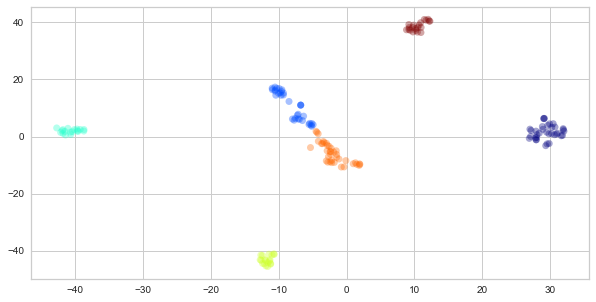

In [104]:
gm = GaussianMixture(n_components=6, random_state=0).fit(X)
gm_y = gm.predict(X)
plt.figure(figsize = (10,5))
plt.scatter(Y[:,0],Y[:,1], edgecolor = "None", c = gm_y, cmap="jet", alpha=0.35)

In [98]:
fig = px.scatter_3d(None, x=principalDf['pc1'], y=principalDf['pc2'],z=principalDf['pc3'], color = gm_y)
fig.update_traces(marker=dict(size=3))
fig.update(layout_coloraxis_showscale=False)
fig.show()

In my opinion, GaussianMixture is a good model for clustering this models.
Now I am going to try other clustering types.

# DBSCAN
DBSCAN is a Density-based clustering method. In this method, there is no need to specify the number of clusters. It also avoids outliers, and works quite well with arbitrarily shaped clusters.
Before applying the model, I determine the proper epsilon by Elbow Method. it is arround 40.

 
Epsilon (ɛ): Max radius of the neighborhood. Infact, it is the distance that DBSCAN uses to determine if two points are similar and belong together.
A larger epsilon will produce broader clusters (encompassing more data points) and a smaller epsilon will build smaller clusters. 
 
min_samples: number of samples in a neighborhood for a point to be considered as a core point.

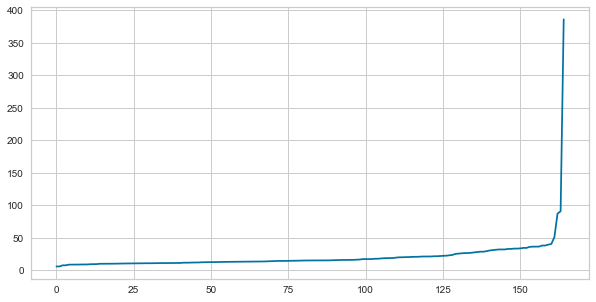

In [117]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=10)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize = (10,5))
plt.plot(distances)

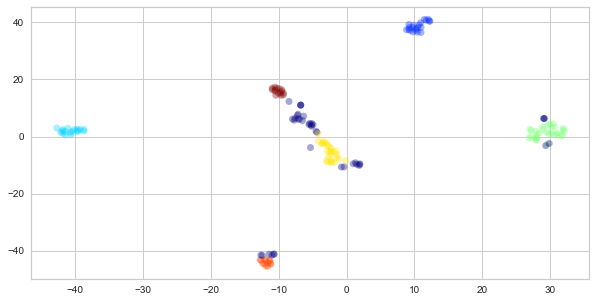

In [118]:
# eps: specifies how close points should be to each other to be considered a part of a cluster.
dbsc = cluster.DBSCAN(eps=40, min_samples=10)
Y_dbscan = dbsc.fit_predict(X)
plt.figure(figsize = (10,5))
plt.scatter(Y[:,0],Y[:,1], edgecolor = "None", c = Y_dbscan, cmap="jet", alpha=0.35)

In [119]:
fig = px.scatter_3d(None, x=principalDf['pc1'], y=principalDf['pc2'],z=principalDf['pc3'], color = Y_dbscan)
fig.update_traces(marker=dict(size=3))
fig.update(layout_coloraxis_showscale=False)
fig.show()

In [120]:
(set(dbsc.labels_))

{-1, 0, 1, 2, 3, 4, 5}

DBSCAN did not seem a good model for clustering this dataset. and it detect a lot of outliers.

# Hierarchical clustering
Hierarchical clustering separates data into groups based on some measure of similarity. It is too sensitive to noise in the data. As the dataset is small enough, this method is good method.
#### Ward Linkage
To determine the number of clusters for our dataset, I use dendrogram using Ward Linkage method.
when I draw a horizontal line on 600, it passes through longest distance without a horizontal line, an I get 6 clusters.
#### Agglomerative Clustering
The next step is to group the data by a Hierarchical clustering. I am going examine agglomerative clustering. in this method each node represents a single cluster at first; eventually, nodes start merging based on their similarities and all nodes belong to the same cluster.

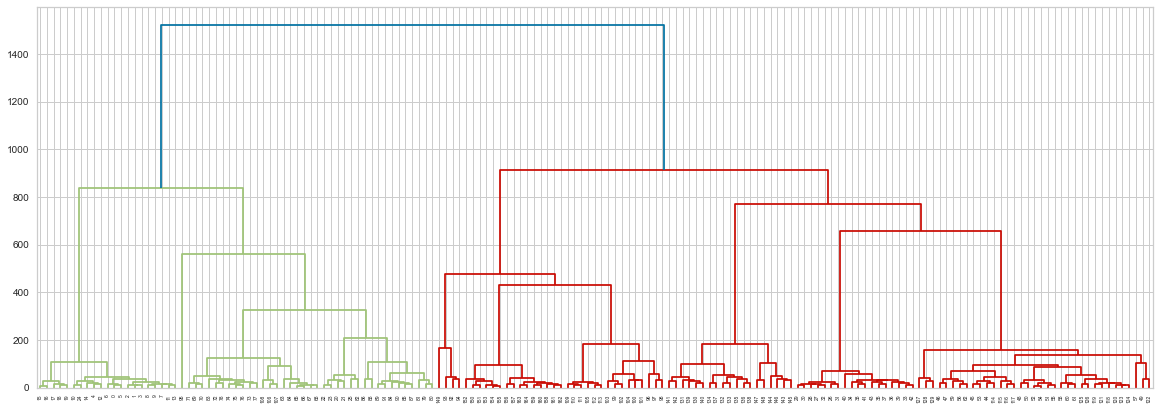

In [121]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, 'ward')
plt.figure(figsize = (20,7))

dn = dendrogram(Z)

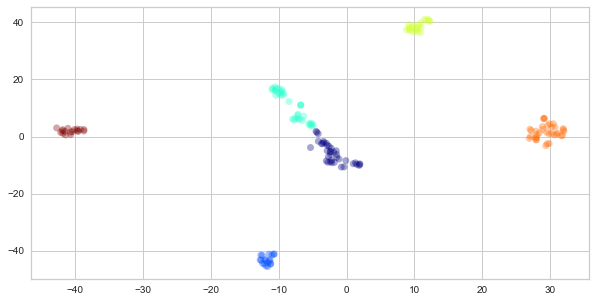

In [122]:
from sklearn.cluster import AgglomerativeClustering
agg_clustering = AgglomerativeClustering(n_clusters=6).fit(X)
plt.figure(figsize = (10,5))
plt.scatter(Y[:,0],Y[:,1], edgecolor = "None", c = agg_clustering.labels_, cmap="jet", alpha=0.35)

In [123]:
fig = px.scatter_3d(None, x=principalDf['pc1'], y=principalDf['pc2'],z=principalDf['pc3'], color = agg_clustering.labels_)
fig.update_traces(marker=dict(size=3))
fig.update(layout_coloraxis_showscale=False)
fig.show()

# Graph-based Clustering
Spectral Clustering is of graph-based clustering methods that is robust for high-dimensional data as it uses the distance on a graph, which is more meaningful in high dimensions.
below visualisation shows that this method is great model for clustering of primate dataset.

C:\Users\a.jalali\anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:259: UserWarning:

Graph is not fully connected, spectral embedding may not work as expected.



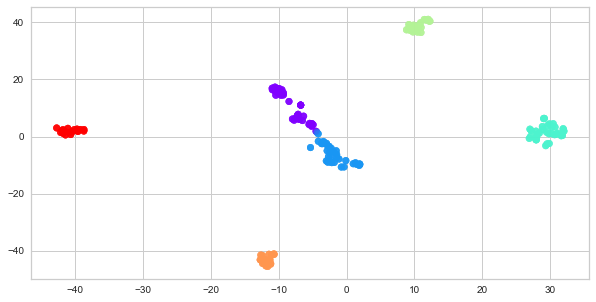

In [124]:
sc = SpectralClustering(n_clusters=6, affinity="nearest_neighbors", n_neighbors=20).fit(X)
sc_y = sc.labels_
plt.figure(figsize = (10,5))
for i in range(7):
    plt.scatter(Y[:,0],Y[:,1], edgecolor = "None", c = sc_y, cmap="rainbow", alpha=0.35)

In [125]:
fig = px.scatter_3d(None, x=principalDf['pc1'], y=principalDf['pc2'],z=principalDf['pc3'], color = sc_y)
fig.update_traces(marker=dict(size=3))
fig.update(layout_coloraxis_showscale=False)
fig.show()

## Conclusion
Agglomerative Hierarchical clustering is one of the best method for clustering this dataset because it is based on similarity. As mentioned in Data Inspection part, it seemed that there were some outliers and this method could managed them properly.
In addition, Spectral Clustering as a graph-based clustering method and GaussianMixture as a Density-based clustering method could group this dataset well because of their distinct advantages.